# Part II - Communicate Data Findings
## by Peter Akinnawonu

## Investigation Overview

The purpose of this analysis is to investigate the performance of loans by looking at the dataset in terms of completed repayments, profits and return on investments and looking at various trends and factors which may be responsible for performance of loans. I would summarize in this report, the actions taken to analyze the various relationships: univariate, bivariate, and multivariate between variables in the dataset.

This is an Exploratory and Explanatory Data Analaysis where I will be using visualizations to communicate my findings.



## Dataset Overview

The Dataset I will be wrangling, analyzing and communicate my findings is the Prosper Loan Dataset. This data set is a record of loans given out by Prosper, a loan company in the United States. (www.prosper.com) The loan data contains records of 113,937 loans in total. 

The features of interest to this study are loan status, Employment Status, the borrower's home ownership status, state, verifiable income, and occupation. Steps were taken to clean the data to make it suitable for analysis. These steps include filling null values, dropping duplicate rows, renaming columns and transforming names.

In [1]:
# To import python libaries for analysis
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv("prosperLoanData.csv")

In [31]:
dfb = df.copy()

# To change all the column names to lower case

dfb.rename(columns = str.lower, inplace = True)

# To fill the null borrower apr values with the mean 

dfb['borrowerapr'] = dfb['borrowerapr'].fillna(dfb['borrowerapr'].mean())

#  To fill null values in borrowerstate with 'unnamed'

dfb['borrowerstate'].fillna('unnamed', inplace = True)

# To fill null occupation with 'nojob'

dfb['occupation'].fillna('nojob', inplace = True)

bins = np.arange(1,11,.5)

In [12]:
# To display full rows and columns

pd.set_option('display.max_rows', None, 'display.max_columns', None)

## (Visualization 1: Histogram)

####  This visuals depicts the Distribution per Count of Prosper Score. 
#### The Observation shows that majority of the borrowers have a Prosper Score of 4

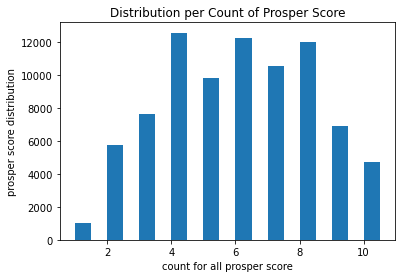

In [24]:
plt.hist(data = dfb , x = "prosperscore" , bins = bins)
plt.title("Distribution per Count of Prosper Score")
plt.xlabel("count for all prosper score")
plt.ylabel("prosper score distribution");

## (Visualization 2: PIE CHART)

####  This visuals depicts the Number of loans based on Loan Status. 
#### The Observation shows that About 50% of the total loans are current, (ongoing) 34% are completed, 10.7% are Chargedoff while 4.5% are defaulted.

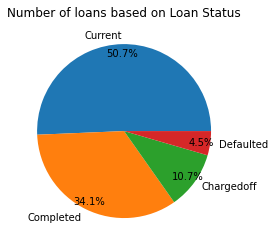

In [25]:
# the top 4 loan Status
Loanstat = df["LoanStatus"].value_counts()[:4]
Loan_num = Loanstat.index
plt.title("Number of loans based on Loan Status");    
plt.pie(Loanstat, labels = Loan_num , autopct= "%.1f%%", pctdistance=.9);

## (Visualization 3: SCATTER PLOT)

####  This visuals depicts the correlation between borrowerrate and borrower Annual Percentage Rate. 
#### The Observation shows a positive correlation between the borrowerrate and borrowerapr.

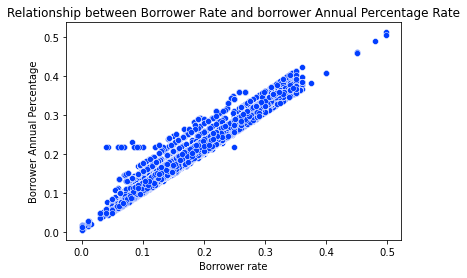

In [26]:
sb.scatterplot(data = dfb, x = "borrowerrate", y = "borrowerapr", color= coloring);
plt.title("Relationship between Borrower Rate and borrower Annual Percentage Rate")
plt.ylabel("Borrower Annual Percentage")
plt.xlabel("Borrower rate");
reg_title = 'regression relationship',

## (Visualization 4: REGRESSION PLOT)

####  This visuals depicts the connection between prosper rating and Lender yield. 
#### The Observation shows that when the borrower has a good prosper score , this has a negative effect on the lendersyield

Text(0.5, 1.0, 'Prosper Rating Numeric based on Lender Yield')

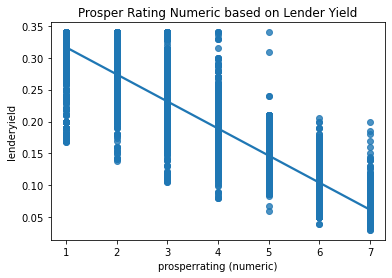

In [28]:
sb.regplot(data = dfb , x = "prosperrating (numeric)" , y = "lenderyield");
plt.title("Prosper Rating Numeric based on Lender Yield")

## (Visualization 5: BOX PLOT)

Text(0.5, 1.0, 'Box plot showing Prosper Score')

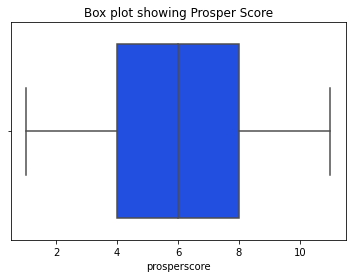

In [21]:
coloring = sb.color_palette("bright")[0]
sb.boxplot(data = dfb , x = "prosperscore", color=coloring);
plt.title("Box plot showing Prosper Score")

## (Visualization 6: VIOLIN PLOT)

#### This visuals depicts how prosperrating is related to loan status.

#### The Observation shows that Current loans seems to have better prosper score than other loan status.

Text(0.5, 1.0, 'Prosper Rating Numeric based on Loan Status')

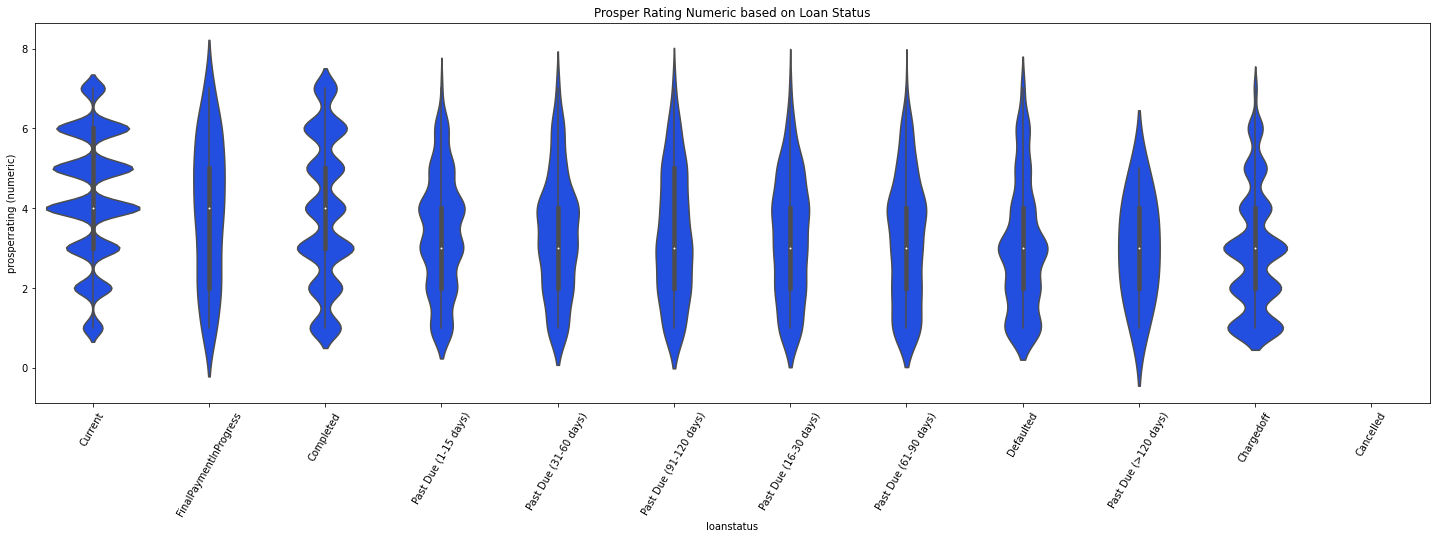

In [34]:
loan_rating = dfb.groupby("loanstatus")["prosperrating (numeric)"].mean().sort_values(ascending = False)
rate_index = loan_rating.index

plt.figure(figsize= [25,7])
sb.violinplot(data = dfb , x = "loanstatus", y  ="prosperrating (numeric)" , color=coloring, 
              order= rate_index)
plt.xticks(rotation = 60);
plt.title("Prosper Rating Numeric based on Loan Status")

## (Visualization 7: LABELS)

#### This visuals depicts whether the borrower own a home and how does it affect loan performance.
#### The Observation shows that the number of Borrowers that own a home is above 5000, and are almost the same as the number of borrowers that do not own a home. This shows that home ownership does not afftect loan performance

Text(0.5, 1.0, 'Does the Borrower Owns a Home')

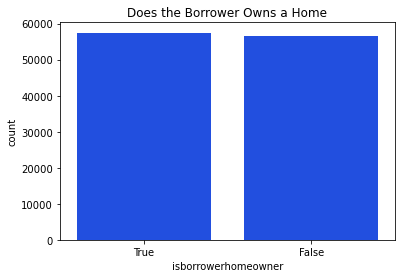

In [40]:
labels = dfb["isborrowerhomeowner"].value_counts().index
coloring = sb.color_palette("bright")[0]
sb.countplot(data = dfb , x = "isborrowerhomeowner", color=coloring, order=labels)
plt.title("Does the Borrower Owns a Home")

In [39]:
# !jupyter nbconvert Pet Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt